a= 0.7912787795066833


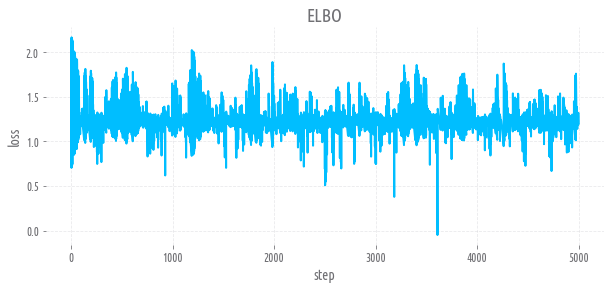

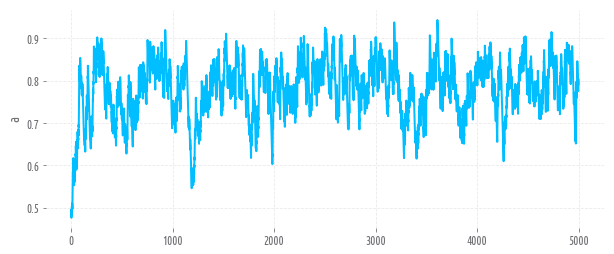

In [22]:
import numpy as np
import torch

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

import matplotlib.pyplot as plt

pyro.set_rng_seed(101)

def rain():
    cloudy = pyro.sample('cloudy', dist.Bernoulli(0.7))
    if (cloudy == 0):
        p = 0.8
    else:
        p = 0.2
    rain = pyro.sample('rain', dist.Bernoulli(p))

conditioned_rain = pyro.condition(rain, {'cloudy': 0})

def rain_guide():
    a = pyro.param("a", torch.tensor(0.5))
    return pyro.sample('rain', dist.Bernoulli(a))

pyro.clear_param_store()
svi = pyro.infer.SVI(
    model=conditioned_rain,
    guide=rain_guide,
    optim=pyro.optim.SGD({"lr": 0.005, "momentum":0.1}),
    loss=pyro.infer.Trace_ELBO())

losses, a    = [], []
num_steps = 5000
for t in range(num_steps):
    losses.append(svi.step())
    a.append(pyro.param("a").item())

print("a=", pyro.param("a").item())

plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title("ELBO")
plt.xlabel("step")
plt.ylabel("loss")
plt.show()

plt.figure(figsize=(10, 4))
#plt.plot([0,num_steps],[0.8, 0.8], 'k:')
plt.plot(a)
plt.ylabel('a')
plt.show()
